In [1]:
from datetime import datetime

from pathlib import Path

import numpy as np
from scipy.stats import lognorm
import pandas as pd

from astropy import stats
import astropy.units as u
from astropy.io import fits

from matplotlib import style
style.use("seaborn")
style.use('ggplot')
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
#%matplotlib widget

In [3]:
rootdir = Path("/mnt/f/wfsdat")
# use find to make this csv list
with open(rootdir / "reanalyze_csvs_2022_q1.txt") as f:
    csvs = f.readlines()

# loop through the csv files and read them with pandas
frames = []
for csv in csvs:
    frames.append(pd.read_csv(rootdir / csv.rstrip()))

# now concat each frame into one big frame containing all of the data
data = pd.concat(frames)

In [4]:
g = data.groupby('wfs')
g.wfs.describe()

,count,unique,top,freq
wfs,,,,
binospec,12026,1,binospec,12026
f5,926,1,f5,926
mmirs,59,1,mmirs,59


In [5]:
# re-calculate the seeing using updated spot FWHM for binospec. filter out any NaN values...
#fixed_list = []
#for wfskey, group in g:
#    wfs = wfs_systems[wfskey]
#    group = g.get_group(wfskey)
#    #group.apply(seeing, axis=1, args=(wfs,))
#    group['fixed_raw_seeing'], group['fixed_seeing'] = seeing(group, wfs)
#    fixed_list.append(group)
#fixed = pd.concat(fixed_list)
#fixed.rename(index=str, columns={"seeing": "orig_seeing", "raw seeing": "orig_raw_seeing"}, inplace=True)
#fixed.rename(index=str, columns={"fixed_seeing": "seeing", "fixed_raw_seeing": "raw seeing"}, inplace=True)
fixed = data[np.isfinite(data['seeing'])]
fixed = fixed[fixed['fwhm'] > 0.]
fixed = fixed[fixed['seeing'] > 0.]
fixed = fixed[fixed['seeing'] < 4.]
#fixed = fixed[fixed['time'] < "2020-12-31"]

In [6]:
fixed.sort_values(by='time')

,time,wfs,file,exptime,airmass,az,el,osst,outt,chamt,...,focerr,cc_x_err,cc_y_err,xcen,ycen,seeing,raw_seeing,fwhm,wavefront_rms,residual_rms
0,2022-01-05T01:44:24,f5,manual_wfs_0000.fits,30.0,1.6382,207.718372,37.620416,10.00,5.1,6.761,...,-5.83,-5.446,2.616,245.994485,265.996827,1.642716,2.208934,11.640139,1178.178190,2346.803640
1,2022-01-05T01:46:20.640000,f5,manual_wfs_0001.fits,30.0,1.6454,208.256616,37.427962,9.95,5.1,6.666,...,15.72,0.282,1.762,245.998224,264.998201,1.448590,1.953028,10.542267,874.125189,2326.700164
2,2022-01-05T01:47:40.128000,f5,manual_wfs_0002.fits,30.0,1.6504,208.618865,37.295837,9.90,5.1,6.699,...,14.34,1.723,0.000,243.991717,265.997317,1.531521,2.068599,11.040396,565.322033,2673.077931
3,2022-01-05T01:48:49.248000,f5,manual_wfs_0003.fits,30.0,1.6548,208.936857,37.178066,9.85,5.1,6.555,...,11.12,-0.000,2.267,244.998963,270.004180,1.478422,2.000073,10.745509,792.615833,2441.009302
4,2022-01-05T01:50:00.960000,f5,manual_wfs_0004.fits,30.0,1.6595,209.262262,37.055822,9.80,5.0,6.687,...,19.55,-0.000,0.000,244.004409,267.006825,1.383514,1.874865,10.203121,919.605830,2415.823017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649,2022-03-28T11:31:16.444000,binospec,wfs_ff_cal_img_2022.0328.113116.fits,40.0,1.0829,-30.165377,67.437975,7.60,7.2,7.744,...,0.00,0.000,-0.000,254.019637,251.991069,1.216844,1.276403,6.325237,163.290543,1323.645913
650,2022-03-28T11:31:59.698000,binospec,wfs_ff_cal_img_2022.0328.113159.fits,40.0,1.0835,-30.407699,67.352852,7.60,7.2,7.942,...,-0.00,0.000,0.000,253.994197,251.015433,1.215564,1.275484,6.321680,137.281324,1269.561840
651,2022-03-28T11:32:42.930000,binospec,wfs_ff_cal_img_2022.0328.113242.fits,40.0,1.0841,-30.617651,67.277847,7.60,7.2,8.017,...,1.71,0.024,0.377,252.998469,250.984657,1.386534,1.455365,7.012624,186.789744,1406.710722
652,2022-03-28T11:33:26.220000,binospec,wfs_ff_cal_img_2022.0328.113326.fits,40.0,1.0847,-30.826102,67.202359,7.60,7.3,7.868,...,-1.27,-0.000,0.431,253.011853,250.006045,1.413906,1.484590,7.123864,131.077438,1259.197306


In [7]:
# create a date-time index so we can group and analyze the data by timestamps
fixed = fixed.set_index(pd.DatetimeIndex(fixed['time'], name='ut'))

<Figure size 576x360 with 0 Axes>

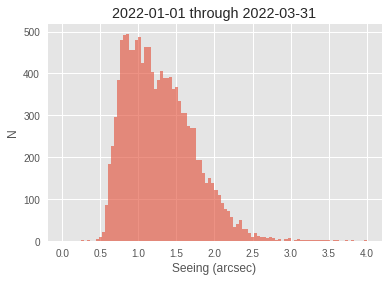

In [8]:
# make raw histogram of the zenith-corrected seeing column
fig = plt.figure(figsize=(8, 5))
fixed.hist(column='seeing', bins=100, range=(0.0, 4.0), alpha=0.6)
with plt.style.context('ggplot'):
    plt.title("2022-01-01 through 2022-03-31")
    plt.xlabel("Seeing (arcsec)")
    plt.ylabel("N")
plt.show()

In [9]:
# fit a log-normal distribution to the seeing data
sigma, loc, exp_mu = lognorm.fit(fixed['seeing'])
print(sigma, loc, exp_mu)
x = np.arange(0.0, 4.0, 0.01)
p = lognorm.pdf(x, sigma, loc=loc, scale=exp_mu)
mu = np.log(exp_mu)
mode = np.exp(mu - sigma**2) + loc
median = np.nanmedian(fixed['seeing'])
fit_median = exp_mu + loc

0.37317187992193834 0.09912558854905518 1.102400114990338


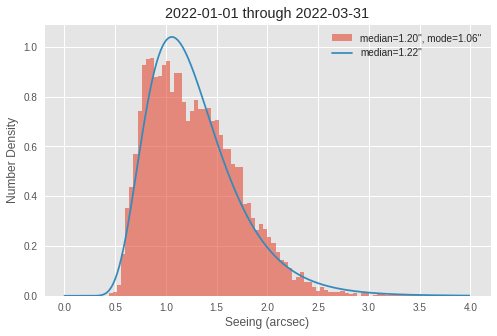

In [10]:
# plot normalized histogram with the fit and the median/mode calculated from the fit.
fig = plt.figure(figsize=(8, 5))
with plt.style.context('ggplot'):
    plt.hist(fixed['seeing'], density=True, bins=100, range=(0.0, 4.0), label="hist", alpha=0.6)
    logp = plt.plot(x, p, label="logp")
    plt.xlabel("Seeing (arcsec)")
    plt.ylabel("Number Density")
    plt.title("2022-01-01 through 2022-03-31")
    plt.legend(["median=%.2f\", mode=%.2f\"" % (fit_median, mode), "median=%.2f\"" % (
        median
    )])
    plt.savefig("2022q1_hist.png")
plt.show()

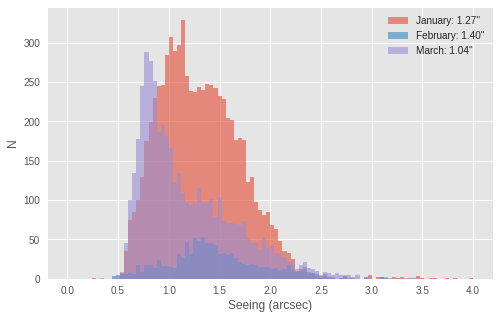

In [11]:
# panda time indexing makes it easy to group by month
fig = plt.figure(figsize=(8, 5))
months = {}
legends = []
months['January'] = fixed.loc['2022-01']
months['February'] = fixed.loc['2022-02']
months['March'] = fixed.loc['2022-03']
for m in months:
    plt.hist(months[m]['seeing'], bins=100, range=(0.0, 4.0), label=m, alpha=0.6)
    legend = "%s: %.2f\"" % (m, np.median(months[m]['seeing']))
    legends.append(legend)
plt.legend(legends)
plt.xlabel("Seeing (arcsec)")
plt.ylabel("N")
#plt.title("Data and median seeing values grouped by month")
plt.savefig("2022q1_monthly.png")
plt.show()

In [12]:
# now use the between_time() method to split the data into first and second halves of the night.
first_half = fixed.between_time(start_time='00:00', end_time='07:00')
second_half = fixed.between_time(start_time='07:00', end_time='14:00')
#first_half = months['December'].between_time(start_time='00:00', end_time='07:00')
#second_half = months['December'].between_time(start_time='07:00', end_time='14:00')
med_1st = np.median(first_half['seeing'])
med_2nd = np.median(second_half['seeing'])

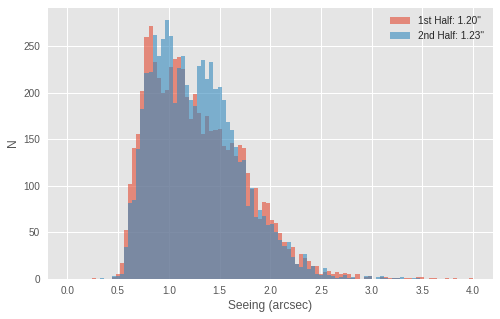

In [13]:
# plot the results and show that the seeing is better later in the night...
fig = plt.figure(figsize=(8, 5))
plt.hist(first_half['seeing'], bins=100, range=(0.0, 4.0), label="1st", alpha=0.6)
plt.hist(second_half['seeing'], bins=100, range=(0.0, 4.0), label="2nd", alpha=0.6)
plt.legend(["1st Half: %.2f\"" % med_1st, "2nd Half: %.2f\"" % med_2nd])
plt.xlabel("Seeing (arcsec)")
plt.ylabel("N")
#plt.title("Data and median seeing values grouped by half of the night")
plt.savefig("2022q1_1st2nd.png")
plt.show()

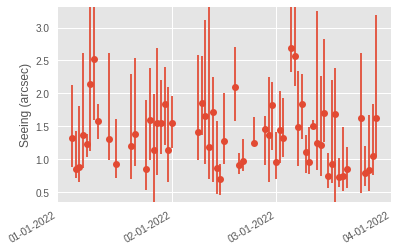

In [15]:
import matplotlib.dates as mdates

# make a new data frame that resamples the WFS data daily into the median, min, and max seeing for each day.
#fixed = fixed["2018-06-30":"2018-10-01"]
fig, ax = plt.subplots()
daily = pd.DataFrame()
daily['seeing'] = fixed.seeing.resample('D').median()
daily['max'] = fixed.seeing.resample('D').max()
daily['min'] = fixed.seeing.resample('D').min()
lowb = daily['seeing'] - daily['min']
upb = daily['max'] - daily['seeing']
plt.errorbar(daily.index, daily['seeing'], yerr=[lowb, upb], fmt='o')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d-%Y"))
fig.autofmt_xdate()
plt.ylabel("Seeing (arcsec)")
#plt.title("Nightly median seeing")
plt.savefig("2022q1_nightly.png")
plt.show()

In [16]:
date_list = list(daily.index.strftime('%Y-%m-%d'))
data = [np.array(fixed.loc[date]['seeing']) for date in date_list]
clean_data = {}
for d, arr in zip(date_list, data):
    if len(arr) > 0:
        clean_data[d] = arr
date_labels = [datetime.strptime(d, "%Y-%m-%d").date() for d in clean_data.keys()]

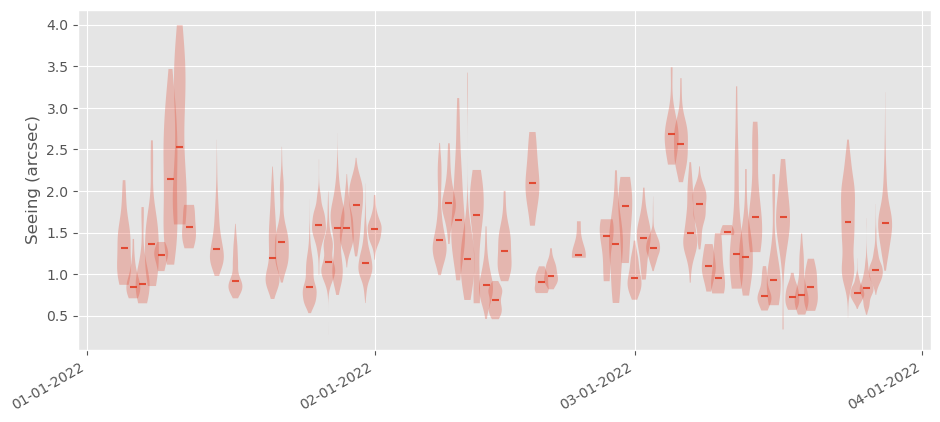

In [17]:
with plt.style.context('ggplot', after_reset=True):
    fig, ax = plt.subplots(figsize=(11,5))
    plt.violinplot(clean_data.values(), mdates.date2num(date_labels), points=50, widths=1.5,
                showextrema=False, showmedians=True, bw_method='silverman')

    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d-%Y"))
    fig.autofmt_xdate()
    plt.ylabel("Seeing (arcsec)")
    plt.savefig("2022q1_violin.png")
    plt.show()

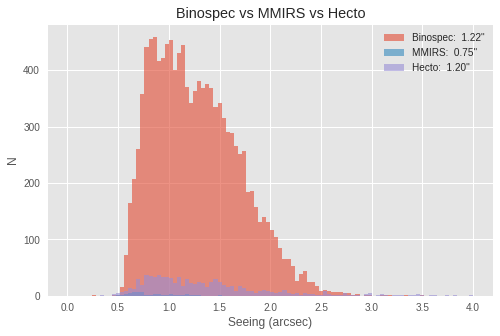

In [18]:
with plt.style.context('ggplot'):
    fig = plt.figure(figsize=(8, 5))
    medb = np.median(fixed['seeing'][fixed['wfs'] == 'binospec'])
    medm = np.median(fixed['seeing'][fixed['wfs'] == 'mmirs'])
    medf = np.median(fixed['seeing'][fixed['wfs'] == 'f5'])
    plt.hist(fixed['seeing'][fixed['wfs'] == 'binospec'], bins=100, range=(0.0, 4.), alpha=0.6, label=f"Binospec: {medb: .2f}\"")
    plt.hist(fixed['seeing'][fixed['wfs'] == 'mmirs'], bins=100, range=(0.0, 4.), alpha=0.6, label=f"MMIRS: {medm: .2f}\"")
    plt.hist(fixed['seeing'][fixed['wfs'] == 'f5'], bins=100, range=(0.0, 4.), alpha=0.6, label=f"Hecto: {medf: .2f}\"")
    plt.legend()
    plt.title("Binospec vs MMIRS vs Hecto")
    plt.xlabel("Seeing (arcsec)")
    plt.ylabel("N")
plt.savefig("bino_vs_mmirs_2022q1.png")
plt.show()

In [18]:
mmirs = fixed[fixed['wfs'] == 'mmirs']